In [2]:
import requests
from PIL import Image
import base64
import io

In [9]:
path_img = '/home/piclick/data/fashion_google/images/test/433380.jpg'

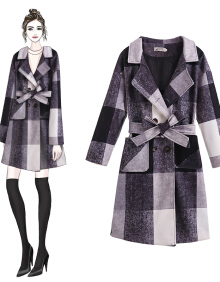

In [10]:
img= Image.open(path_img)
img

In [11]:
img.size

(220, 282)

In [12]:
import base64
from PIL import Image
from io import BytesIO

with open(path_img, "rb") as image_file:
    data = base64.b64encode(image_file.read())

#im = Image.open(BytesIO(base64.b64decode(data)))
#im.save('image1.png', 'PNG')

In [13]:
from __future__ import print_function
import requests
import json
import cv2

addr = "http://47.244.199.204/"
test_url = addr + 'v1/auto_banner'

# prepare headers for http request
content_type = 'image/jpeg'
headers = {'content-type': content_type}

img = cv2.imread(path_img)
# encode image as jpeg
_, img_encoded = cv2.imencode('.jpg', img)

# send http request with image and receive response

response = requests.post(test_url, data=data, headers=headers)

response.json()

{'class': 'Outer',
 'color': [[255, 255, 255], [255, 255, 255]],
 'lt_point': [86, 30],
 'padded_rb_point': [279.55555555555554, 282],
 'resize_ratio': 0.6716417910447762,
 'status': 'S'}

In [20]:
import matplotlib.pyplot as plt
response.json()['lt_point']

[86, 30]

(-0.5, 295.62822580645155, 300.2102649006622, -0.5)

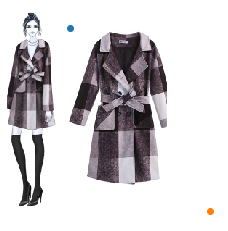

In [50]:
plt.imshow(img)
plt.scatter(response.json()['lt_point'][0],response.json()['lt_point'][1])
plt.scatter(response.json()['padded_rb_point'][0],response.json()['padded_rb_point'][1])
plt.axis('off')

In [53]:
img.shape

(282, 220, 3)

In [40]:
import numpy as np
resize_img = np.asarray(Image.fromarray(img).resize((int(img_w*response.json()['resize_ratio']),int(img_h*response.json()['resize_ratio']))))

(-0.5, 199.04710484388664, 201.63613101709993, -0.5)

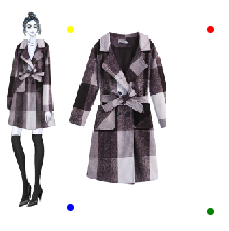

In [56]:
plt.imshow(resize_img)
#plt.scatter(response.json()['lt_point'][0],response.json()['lt_point'][1], c='red')
#plt.scatter(response.json()['padded_rb_point'][0],response.json()['padded_rb_point'][1],c= 'blue')

plt.scatter(response.json()['lt_point'][0]*response.json()['resize_ratio'],response.json()['lt_point'][1]*response.json()['resize_ratio'], c='yellow')
plt.scatter(response.json()['lt_point'][0]*response.json()['resize_ratio']+130,response.json()['lt_point'][1]*response.json()['resize_ratio'], c='red')

plt.scatter(response.json()['padded_rb_point'][0]*response.json()['resize_ratio'],response.json()['padded_rb_point'][1]*response.json()['resize_ratio'], c= 'green')
plt.scatter(response.json()['lt_point'][0]*response.json()['resize_ratio'],response.json()['lt_point'][1]*response.json()['resize_ratio']+166, c='blue')


plt.axis('off')

In [52]:
resize_img.shape

(189, 147, 3)